In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_test =  X_train/255.0, X_test/255.0


In [11]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()
    
    

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       1,048,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,143,242 (4.36 MB)

 Trainable params: 1,143,242 (4.36 MB)

 Non-trainable params: 0 (0.00 B)

In [13]:
history= model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size= 64)

Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 52s 67ms/step - accuracy: 0.3711 - loss: 1.7050 - val_accuracy: 0.6172 - val_loss: 1.0882
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 65ms/step - accuracy: 0.6248 - loss: 1.0551 - val_accuracy: 0.6612 - val_loss: 0.9619
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 50s 71ms/step - accuracy: 0.6990 - loss: 0.8543 - val_accuracy: 0.7134 - val_loss: 0.8336
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 46s 66ms/step - accuracy: 0.7447 - loss: 0.7299 - val_accuracy: 0.7296 - val_loss: 0.7994
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 47s 66ms/step - accuracy: 0.7865 - loss: 0.6155 - val_accuracy: 0.7570 - val_loss: 0.7345
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 49s 69ms/step - accuracy: 0.8174 - loss: 0.5176 - val_accuracy: 0.7490 - val_loss: 0.7829
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 48s 68ms/step - accuracy: 0.8530 - loss: 0.4181 - val_accuracy: 0.7448 - val_loss: 0.8177
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 47s 67ms/step - accuracy: 0.9148 - loss: 0.2490 - 

In [33]:
#Evaluate on test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy: .3f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7245 - loss: 1.1449
Test accuracy:  0.720


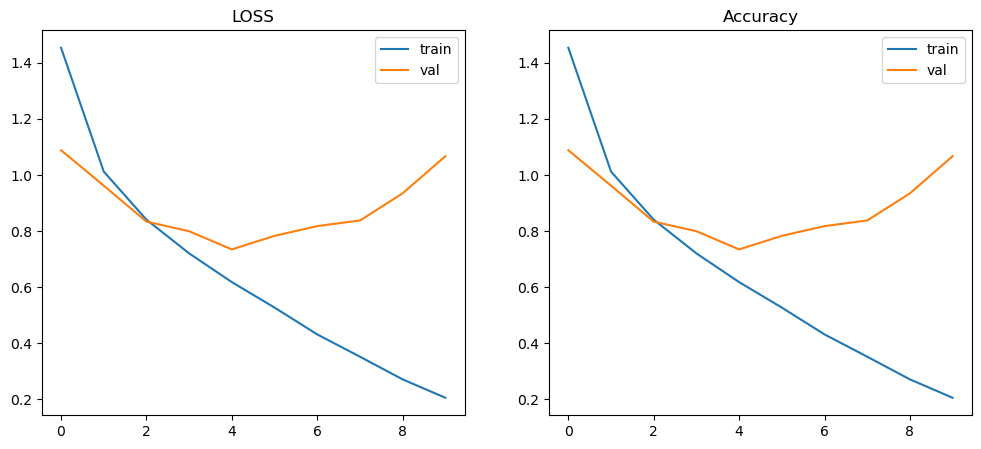

In [15]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('LOSS')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val')
plt.title('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


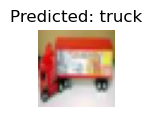

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


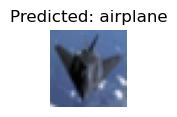

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


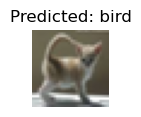

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


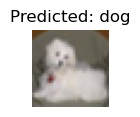

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


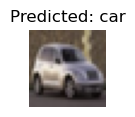

In [27]:
import numpy as np
classes = ['airplane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse','ship', 'truck']
idxs= np.random.choice(len(X_test), 5, replace= False)
for i in idxs:
    img= X_test[i]
    plt.figure(figsize=(2,1))
    plt.imshow(img)
    plt.title("Predicted: "+ classes[np.argmax(model.predict(img[np.newaxis]))])
    plt.axis('off')
    plt.show()